# Examining different MITgcm diagnostics

I want to find out the effects of certain different MITgcm diagnostics and what they actually tell me. To do this I have done several test runs with different diagnostic set ups. 

Below, I am primarily examining two runs: mrb_053 and mrb_054. They are the exact same except for their diagnostics. 

## Differences between mrb_053 and mrb_054

| Description    | mrb_053  | mrb_54   |
|----------------|----------|----------|
| Size           | 2.1G     | 2.8G     |
| Wall clock     | 3089 s   | 3942 s   |
| -n             | 9        | 9        | 
| numDiags       | 10*Nr    | 20*Nr    |
| diagSt_size    | 10*Nr    | 20*Nr    |
| Output streams | surfDiag <br> dynDiag | surfDiag <br> dynDiag <br> vertFlux |
| Num of diags   | 11 <br> 5x single layer <br> 6x full depth | 27 <br> 12x single layer <br> 15x full depth |

### Notes
* dynDiag is the same for both
* surfDiag contains all 1-layer variables
* vertFlux (to be renamed) contains variables that might be useful for future analyses

### In the future
Based on these analyses, a third run called mrb_055 is structured using:
* Only three surface variables (ETAN, TFLUX, and SFLUX)
* Same dynDiag setup but with halved output (I assume this is basically as a backup/check, and I don't envision using it, hence the halved output)
* vertFlux is renamed to fluxDig and contains only three variables (DRHODR, WVELSLT, and WVELTH) but at a higher precision (D vs R)
  * Could potentially reduce to only two output streams in the future

See the "appendix" for a complete list of variables that I'm investigating

In [1]:
# Imports
import xarray as xr
from xmitgcm import open_mdsdataset 
import matplotlib.pyplot as plt
import numpy as np
import basic_model_anayses as bma
import gsw

In [2]:
# Opening the mrb_054 data, since it contains the most variables
fp54 = '/albedo/home/robrow001/MITgcm/so_plumes/mrb_054/' 
ds54_surf = open_mdsdataset(fp54, geometry='cartesian', prefix=['surfDiag'])
ds54_dyn  = open_mdsdataset(fp54, geometry='cartesian', prefix=['dynDiag'])
ds54_vert = open_mdsdataset(fp54, geometry='cartesian', prefix=['vertFlux'])

## Surface variables 

### Standard surface variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  ETAN    |SM      M1|m               |Surface Height Anomaly |
|  ETANSQ  |SM P    M1|m^2             |Square of Surface Height Anomaly |
|  DETADT2 |SM      M1|m^2/s^2         |Square of Surface Height Anomaly Tendency |

/tmp/ipykernel_2227260/326383447.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


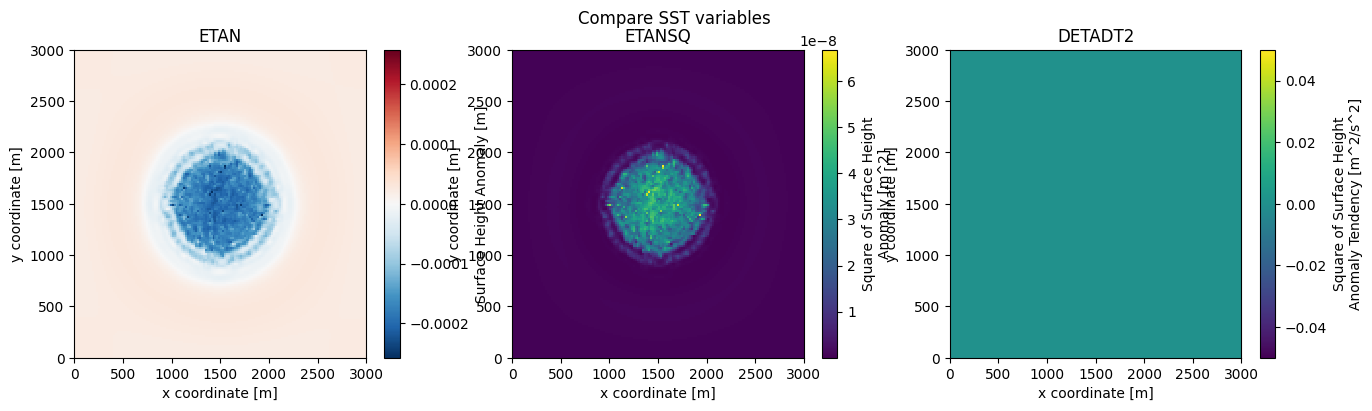

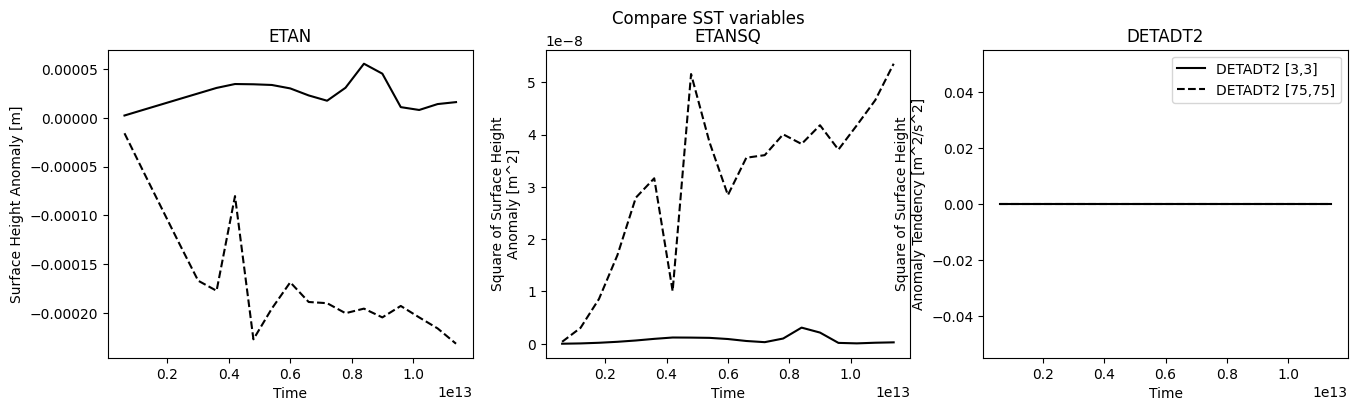

In [3]:
vars = ['ETAN','ETANSQ','DETADT2']
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare SST variables')
for n,var in enumerate(vars):
    ds54_surf[var].isel(time=10).plot(ax=axs[n])
    axs[n].set_title(var)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare SST variables')
for n,var in enumerate(vars):    
    ds54_surf[var].isel(XC=3,YC=3).plot(ax=axs[n],label=var+' [3,3]', c='k', ls='-')
    ds54_surf[var].isel(XC=75,YC=75).plot(ax=axs[n],label=var+' [75,75]', c='k', ls='--')
    axs[n].set_title(var)
    plt.legend()

### Surface flux variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  TFLUX   |SM      U1|W/m^2           |total heat flux (match heat-content variations), >0 increases theta |
|  SFLUX   |SM      U1|g/m^2/s         |total salt flux (match salt-content variations), >0 increases salt |
|  oceQnet |SM      U1|W/m^2           |net surface heat flux into the ocean (+=down), >0 increases theta |
|  oceSflux|SM      U1|g/m^2/s         |net surface Salt flux into the ocean (+=down), >0 increases salinity |
|  surForcT|SM      U1|W/m^2           |model surface forcing for Temperature, >0 increases theta |
|  surForcS|SM      U1|g/m^2/s         |model surface forcing for Salinity, >0 increases salinity |

/tmp/ipykernel_2227260/55089712.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_2227260/55089712.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


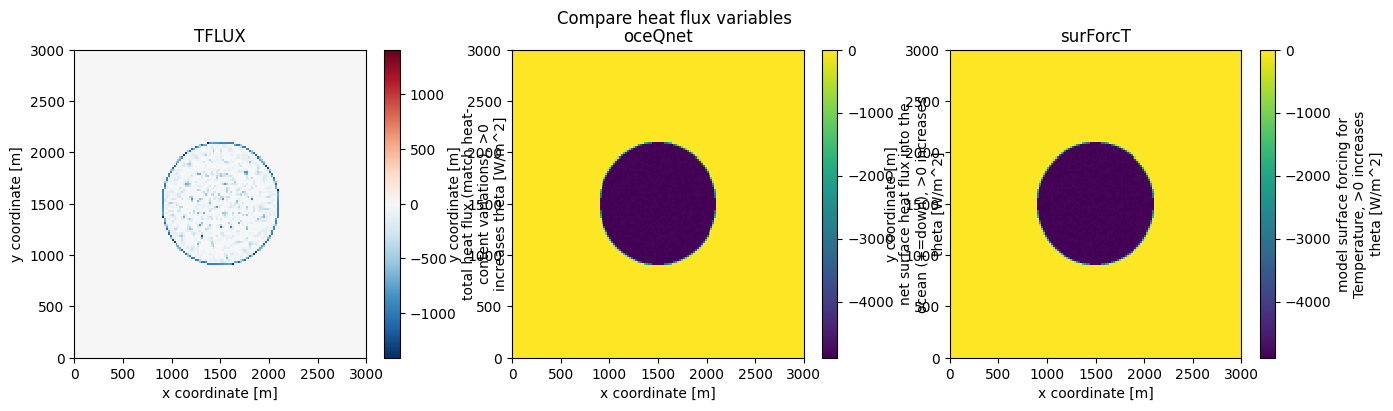

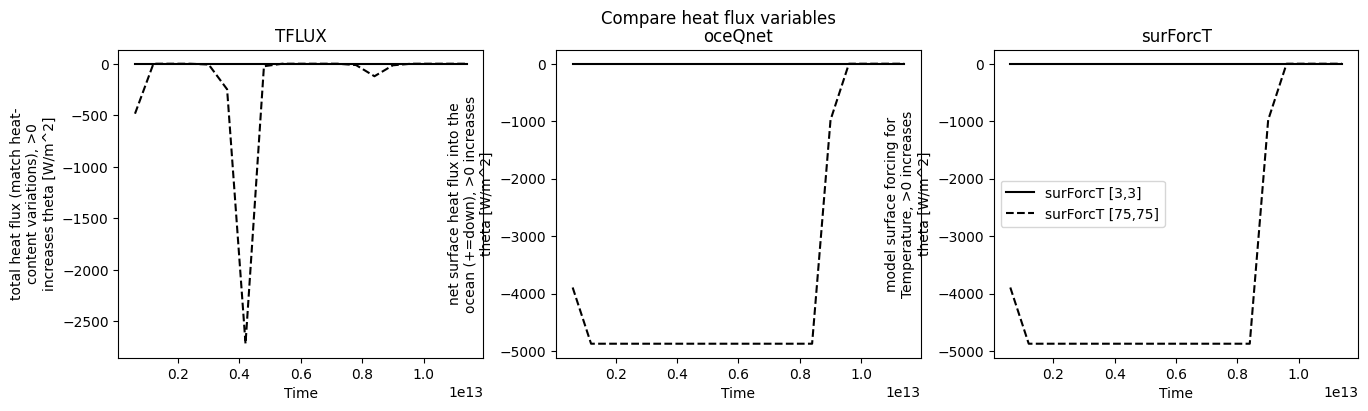

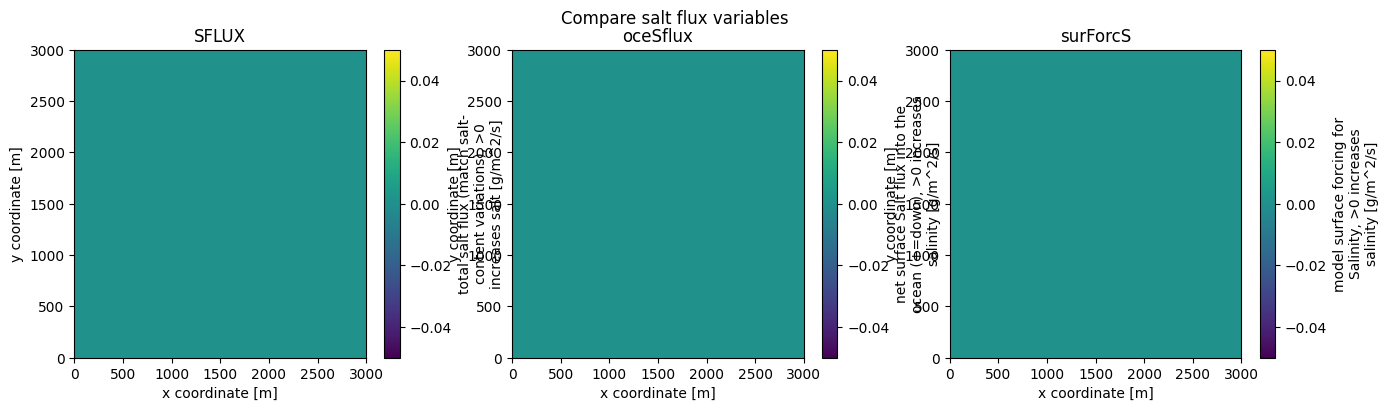

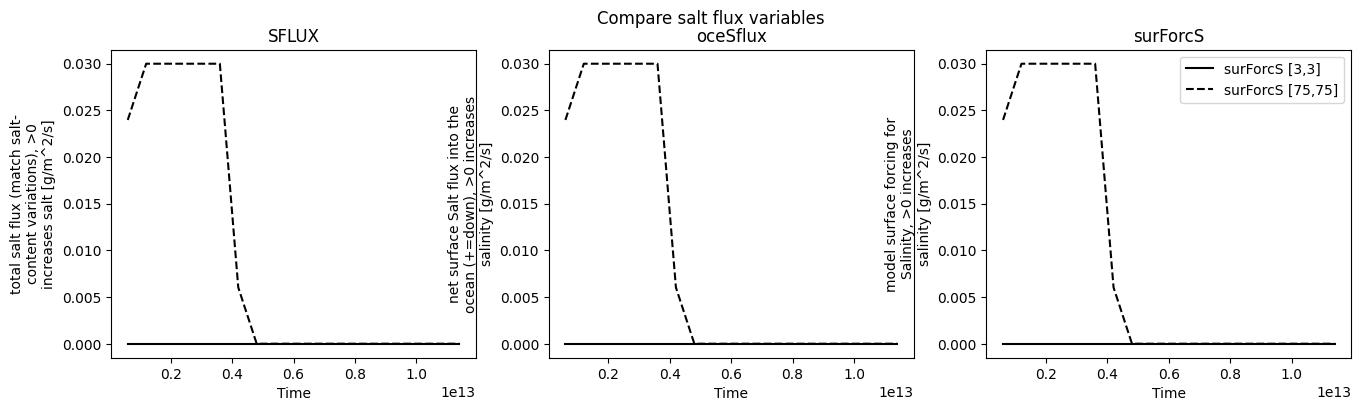

In [4]:
vars = ['TFLUX','oceQnet','surForcT']
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare heat flux variables')
for n,var in enumerate(vars):
    ds54_surf[var].isel(time=10).plot(ax=axs[n])
    axs[n].set_title(var)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare heat flux variables')
for n,var in enumerate(vars):    
    ds54_surf[var].isel(XC=3,YC=3).plot(ax=axs[n],label=var+' [3,3]', c='k', ls='-')
    ds54_surf[var].isel(XC=75,YC=75).plot(ax=axs[n],label=var+' [75,75]', c='k', ls='--')
    axs[n].set_title(var)
    plt.legend()

vars = ['SFLUX','oceSflux','surForcS']
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare salt flux variables')
for n,var in enumerate(vars):
    ds54_surf[var].isel(time=10).plot(ax=axs[n])
    axs[n].set_title(var)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare salt flux variables')
for n,var in enumerate(vars):    
    ds54_surf[var].isel(XC=3,YC=3).plot(ax=axs[n],label=var+' [3,3]', c='k', ls='-')
    ds54_surf[var].isel(XC=75,YC=75).plot(ax=axs[n],label=var+' [75,75]', c='k', ls='--')
    axs[n].set_title(var)
    plt.legend()

### Additional surface variables of interest
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  TRELAX  |SM      U1|W/m^2           |surface temperature relaxation, >0 increases theta |
|  SRELAX  |SM      U1|g/m^2/s         |surface salinity relaxation, >0 increases salt |
|  MXLDEPTH|SM      M1|m               |Mixed-Layer Depth (>0) |

/tmp/ipykernel_2227260/1758297414.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


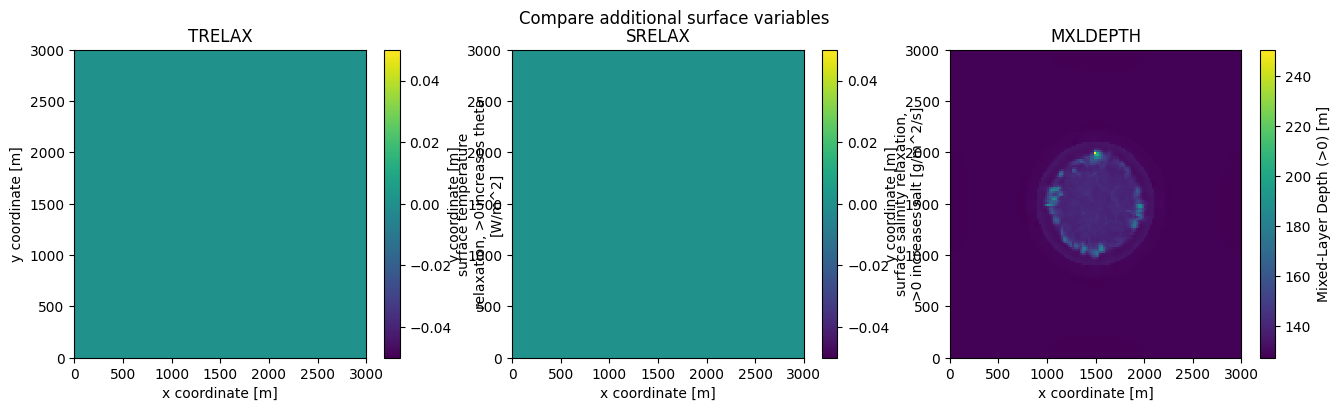

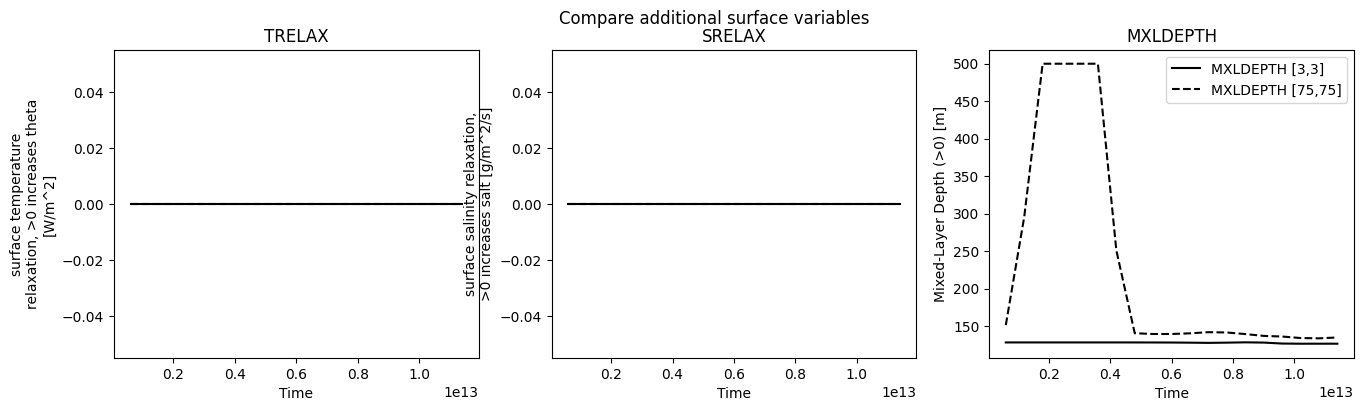

In [5]:
vars = ['TRELAX','SRELAX','MXLDEPTH']
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare additional surface variables')
for n,var in enumerate(vars):
    ds54_surf[var].isel(time=10).plot(ax=axs[n])
    axs[n].set_title(var)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Compare additional surface variables')
for n,var in enumerate(vars):    
    ds54_surf[var].isel(XC=3,YC=3).plot(ax=axs[n],label=var+' [3,3]', c='k', ls='-')
    ds54_surf[var].isel(XC=75,YC=75).plot(ax=axs[n],label=var+' [75,75]', c='k', ls='--')
    axs[n].set_title(var)
    plt.legend()

## 3D full depth variables

### Standard 3D dynamic variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  UVEL    |UUR     MR|m/s             |Zonal Component of Velocity (m/s) |
|  VVEL    |VVR     MR|m/s             |Meridional Component of Velocity (m/s) |
|  WVEL    |WM      LR|m/s             |Vertical Component of Velocity (r_units/s)
|  THETA   |SMR     MR|degC            |Potential Temperature |
|  PHIHYD  |SMR     MR|m^2/s^2         |Hydrostatic Pressure Pot.(p/rho) Anomaly |
|  PHI_NH  |SMR     MR|m^2/s^2         |Non-Hydrostatic Pressure Pot.(p/rho) |

I will leave the pressures for another day. 

For the others (UVEL, VVEL, WVEL, and THETA), I will compare them to the model output binaries. 

In [6]:
# Open the binaries
ds54_u = open_mdsdataset(fp54, geometry='cartesian', prefix=['U'])
ds54_v  = open_mdsdataset(fp54, geometry='cartesian', prefix=['V'])
ds54_w = open_mdsdataset(fp54, geometry='cartesian', prefix=['W'])
ds54_t = open_mdsdataset(fp54, geometry='cartesian', prefix=['T'])

Text(0.5, 1.0, 'Temperature at a point in time')

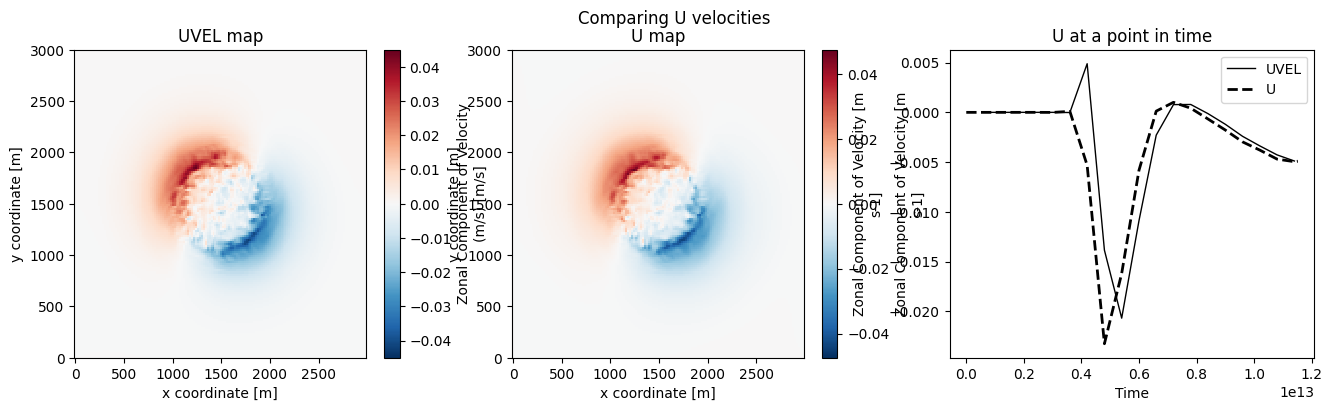

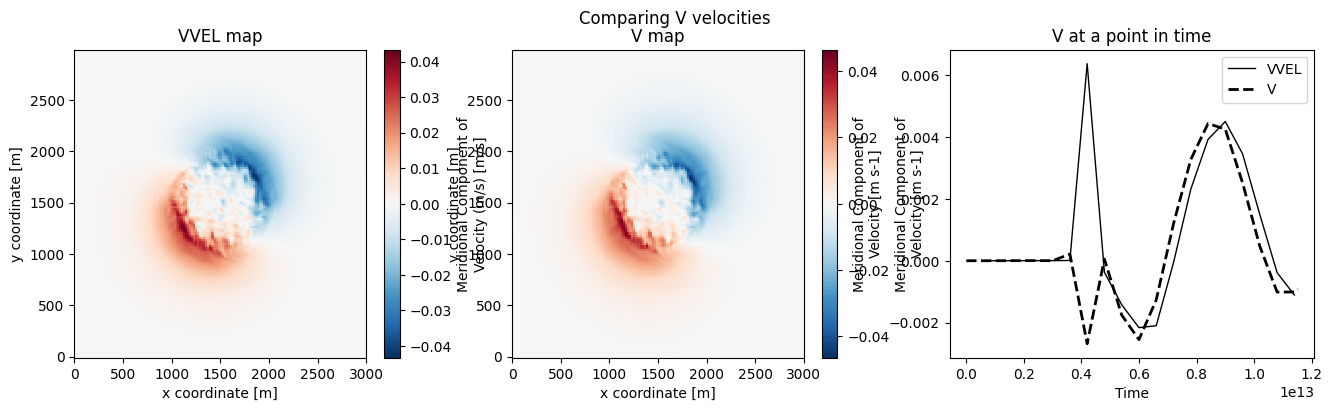

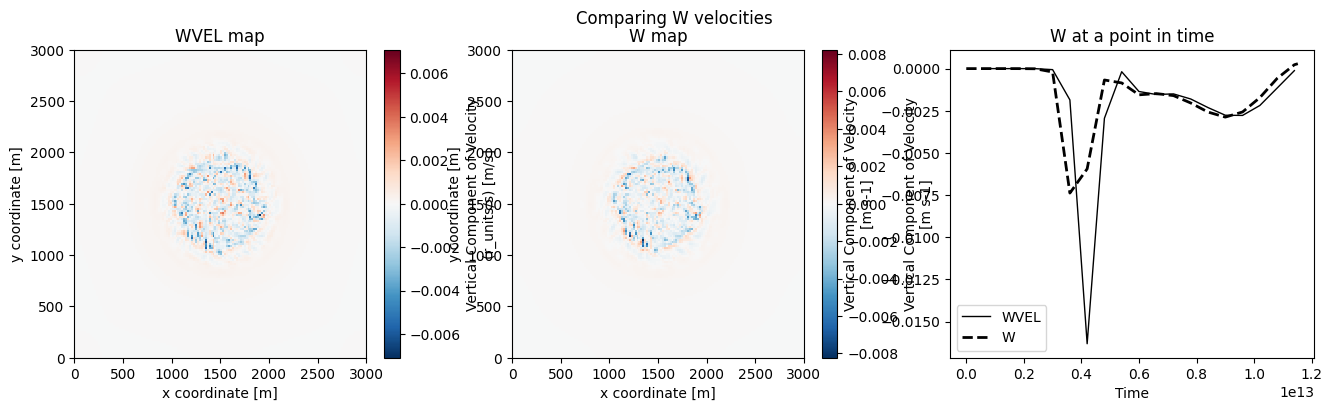

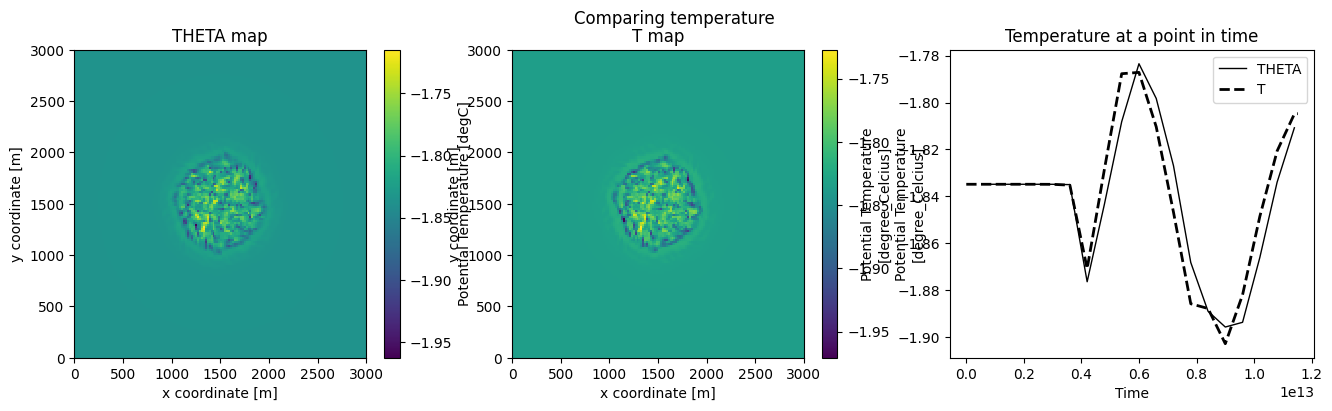

In [7]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Comparing U velocities')
ds54_dyn['UVEL'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('UVEL map')
ds54_u['U'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('U map')
ds54_dyn['UVEL'].isel(XG=70,YC=70,Z=5).plot(ax=axs[2],c='k',ls='-',lw=1,label='UVEL')
ds54_u['U'].isel(XG=70,YC=70,Z=5).plot(ax=axs[2],c='k',ls='--',lw=2,label='U')
axs[2].legend()
axs[2].set_title('U at a point in time')

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Comparing V velocities')
ds54_dyn['VVEL'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('VVEL map')
ds54_v['V'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('V map')
ds54_dyn['VVEL'].isel(XC=70,YG=70,Z=5).plot(ax=axs[2],c='k',ls='-',lw=1,label='VVEL')
ds54_v['V'].isel(XC=70,YG=70,Z=5).plot(ax=axs[2],c='k',ls='--',lw=2,label='V')
axs[2].legend()
axs[2].set_title('V at a point in time')

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Comparing W velocities')
ds54_dyn['WVEL'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('WVEL map')
ds54_w['W'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('W map')
ds54_dyn['WVEL'].isel(XC=70,YC=70,Zl=5).plot(ax=axs[2],c='k',ls='-',lw=1,label='WVEL')
ds54_w['W'].isel(XC=70,YC=70,Zl=5).plot(ax=axs[2],c='k',ls='--',lw=2,label='W')
axs[2].legend()
axs[2].set_title('W at a point in time')

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.suptitle('Comparing temperature')
ds54_dyn['THETA'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('THETA map')
ds54_t['T'].isel(Z=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('T map')
ds54_dyn['THETA'].isel(XC=70,YC=70,Z=5).plot(ax=axs[2],c='k',ls='-',lw=1,label='THETA')
ds54_t['T'].isel(XC=70,YC=70,Z=5).plot(ax=axs[2],c='k',ls='--',lw=2,label='T')
axs[2].legend()
axs[2].set_title('Temperature at a point in time')


### 3D flux variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  WVELSLT |WM      LR|g/kg.m/s        |Vertical Transport of Salinity |
|  WVELTH  |WM      LR|degC.m/s        |Vertical Transport of Pot Temp |
|  ADVr_TH |WM      LR|degC.m^3/s      |Vertical   Advective Flux of Pot.Temperature |
|  ADVr_SLT|WM      LR|g/kg.m^3/s      |Vertical   Advective Flux of Salinity |
|  DFrE_TH |WM      LR|degC.m^3/s      |Vertical Diffusive Flux of Pot.Temperature (Explicit part) |
|  DFrI_TH |WM      LR|degC.m^3/s      |Vertical Diffusive Flux of Pot.Temperature (Implicit part) |
|  DFrE_SLT|WM      LR|g/kg.m^3/s      |Vertical Diffusive Flux of Salinity    (Explicit part) |
|  DFrI_SLT|WM      LR|g/kg.m^3/s      |Vertical Diffusive Flux of Salinity    (Implicit part) |

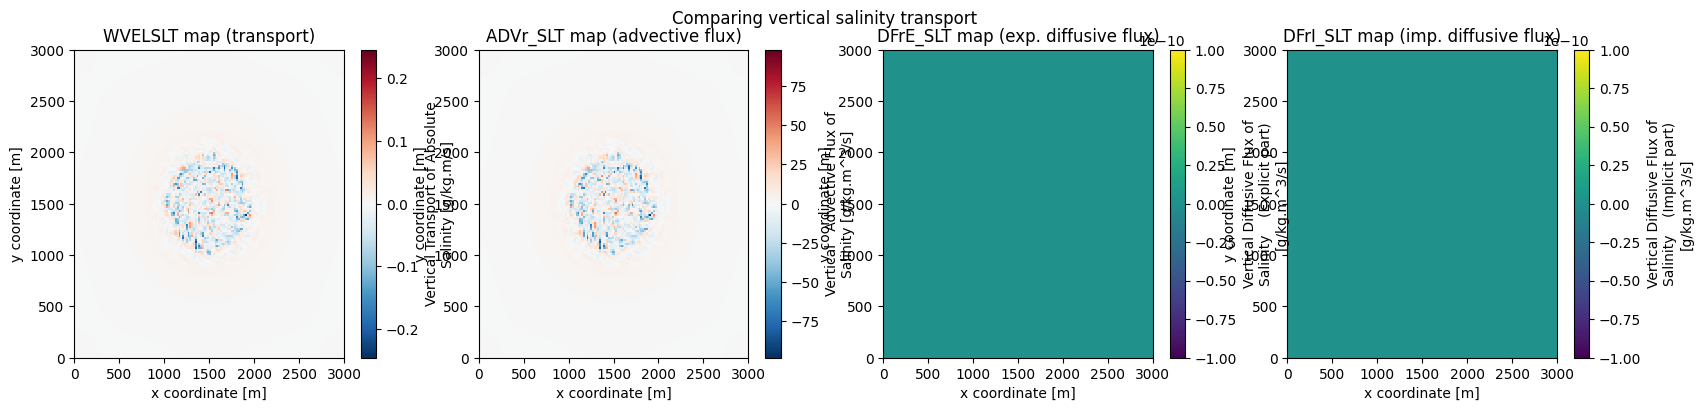

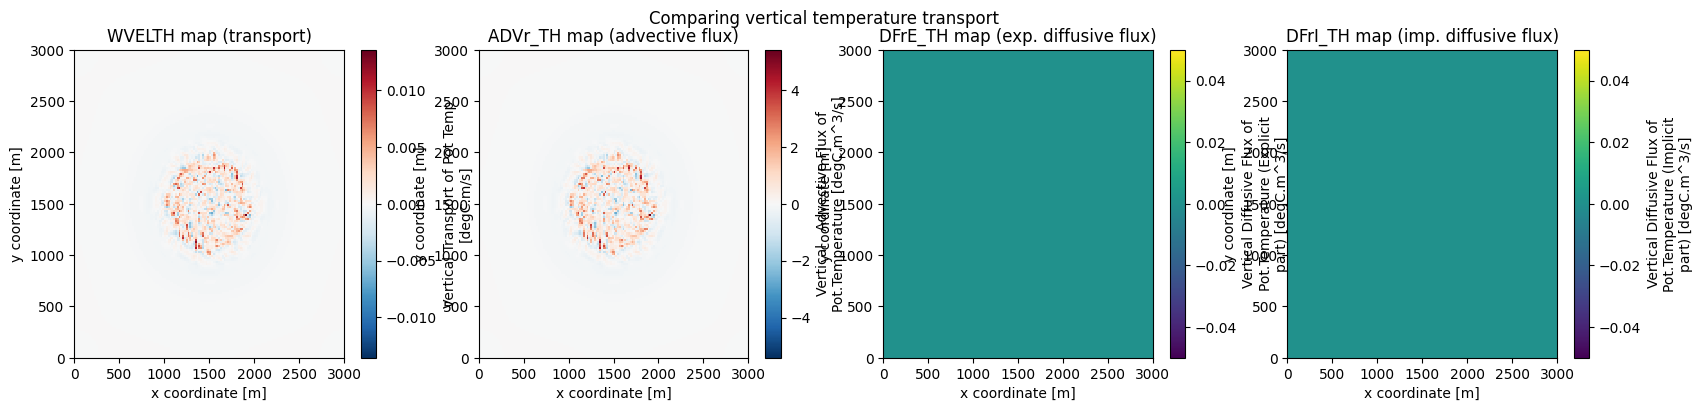

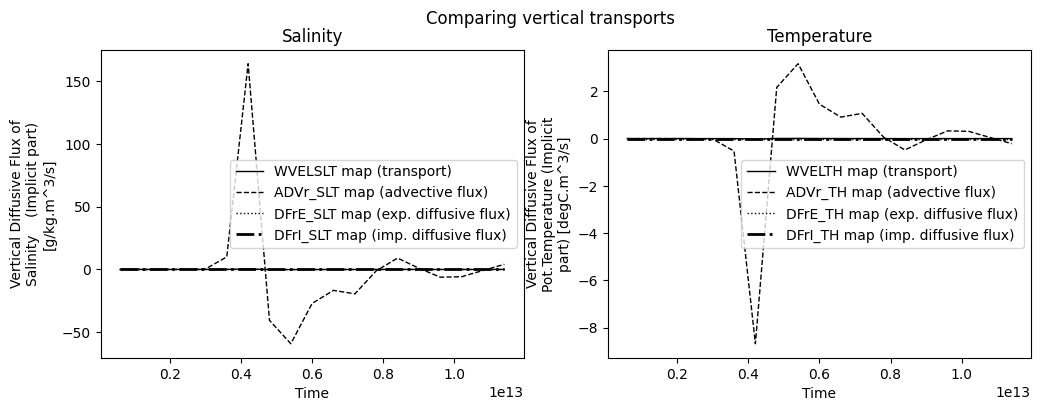

In [13]:
fig, axs = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
plt.suptitle('Comparing vertical salinity transport')
ds54_vert['WVELSLT'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('WVELSLT map (transport)')
ds54_vert['ADVr_SLT'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('ADVr_SLT map (advective flux)')
ds54_vert['DFrE_SLT'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[2],vmin=-0.0000000001,vmax=0.0000000001)
axs[2].set_title('DFrE_SLT map (exp. diffusive flux)')
ds54_vert['DFrI_SLT'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[3],vmin=-0.0000000001,vmax=0.0000000001)
axs[3].set_title('DFrI_SLT map (imp. diffusive flux)')

fig, axs = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
plt.suptitle('Comparing vertical temperature transport')
ds54_vert['WVELTH'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[0])
axs[0].set_title('WVELTH map (transport)')
ds54_vert['ADVr_TH'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1])
axs[1].set_title('ADVr_TH map (advective flux)')
ds54_vert['DFrE_TH'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[2])
axs[2].set_title('DFrE_TH map (exp. diffusive flux)')
ds54_vert['DFrI_TH'].isel(Zl=5).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[3])
axs[3].set_title('DFrI_TH map (imp. diffusive flux)')

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
plt.suptitle('Comparing vertical transports')
ds54_vert['WVELSLT'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[0],label='WVELSLT map (transport)',c='k',ls='-',lw=1)
ds54_vert['ADVr_SLT'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[0],label='ADVr_SLT map (advective flux)',c='k',ls='--',lw=1)
ds54_vert['DFrE_SLT'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[0],label='DFrE_SLT map (exp. diffusive flux)',c='k',ls=':',lw=1)
ds54_vert['DFrI_SLT'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[0],label='DFrI_SLT map (imp. diffusive flux)',c='k',ls='-.',lw=2)
axs[0].set_title('Salinity')
axs[0].legend()
ds54_vert['WVELTH'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[1],label='WVELTH map (transport)',c='k',ls='-',lw=1)
ds54_vert['ADVr_TH'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[1],label='ADVr_TH map (advective flux)',c='k',ls='--',lw=1)
ds54_vert['DFrE_TH'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[1],label='DFrE_TH map (exp. diffusive flux)',c='k',ls=':',lw=1)
ds54_vert['DFrI_TH'].isel(Zl=5,XC=75,YC=75).plot(ax=axs[1],label='DFrI_TH map (imp. diffusive flux)',c='k',ls='-.',lw=2)
axs[1].set_title('Temperature')
axs[1].legend()


### Additional 3D variable(s) of interest
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  DRHODR  |SM      LR|kg/m^4          |Stratification: d.Sigma/dr (kg/m3/r_unit) |

Basically checking out if this looks useful

Text(0.5, 1.0, 'DRHODR (time=+2 hrs))')

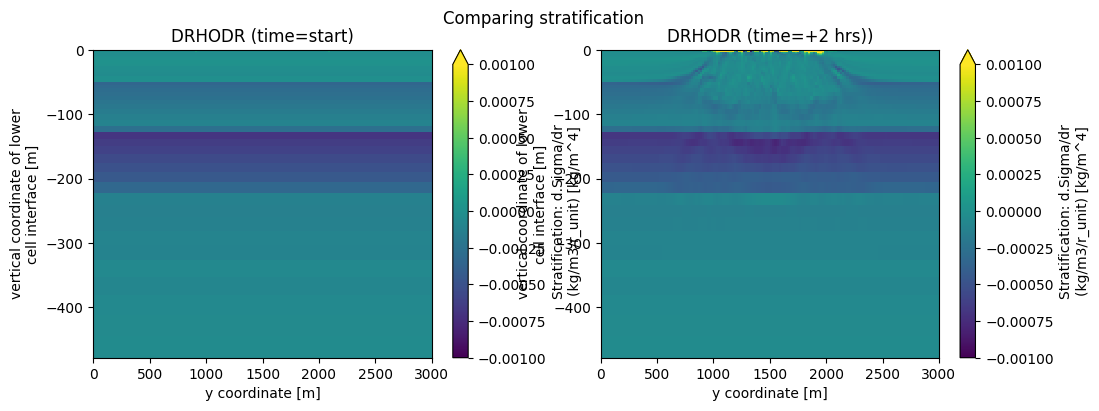

In [9]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
plt.suptitle('Comparing stratification')
ds54_vert['DRHODR'].isel(XC=75).isel(time=0).plot(ax=axs[0],vmin=-0.001,vmax=0.001)
axs[0].set_title('DRHODR (time=start)')
ds54_vert['DRHODR'].isel(XC=75).sel(time=np.timedelta64(int(2*3600*1e9),'ns')).plot(ax=axs[1],vmin=-0.001,vmax=0.001)
axs[1].set_title('DRHODR (time=+2 hrs))')


# Appendix: Complete list of variables

### Standard surface variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  ETAN    |SM      M1|m               |Surface Height Anomaly |
|  ETANSQ  |SM P    M1|m^2             |Square of Surface Height Anomaly |
|  DETADT2 |SM      M1|m^2/s^2         |Square of Surface Height Anomaly Tendency |

### Surface flux variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  TFLUX   |SM      U1|W/m^2           |total heat flux (match heat-content variations), >0 increases theta |
|  SFLUX   |SM      U1|g/m^2/s         |total salt flux (match salt-content variations), >0 increases salt |
|  oceQnet |SM      U1|W/m^2           |net surface heat flux into the ocean (+=down), >0 increases theta |
|  oceSflux|SM      U1|g/m^2/s         |net surface Salt flux into the ocean (+=down), >0 increases salinity |
|  surForcT|SM      U1|W/m^2           |model surface forcing for Temperature, >0 increases theta |
|  surForcS|SM      U1|g/m^2/s         |model surface forcing for Salinity, >0 increases salinity |

### Additional surface variables of interest
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  TRELAX  |SM      U1|W/m^2           |surface temperature relaxation, >0 increases theta |
|  SRELAX  |SM      U1|g/m^2/s         |surface salinity relaxation, >0 increases salt |
|  MXLDEPTH|SM      M1|m               |Mixed-Layer Depth (>0) |

### Standard 3D dynamic variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  UVEL    |UUR     MR|m/s             |Zonal Component of Velocity (m/s) |
|  VVEL    |VVR     MR|m/s             |Meridional Component of Velocity (m/s) |
|  WVEL    |WM      LR|m/s             |Vertical Component of Velocity (r_units/s)
|  THETA   |SMR     MR|degC            |Potential Temperature |
|  PHIHYD  |SMR     MR|m^2/s^2         |Hydrostatic Pressure Pot.(p/rho) Anomaly |
|  PHI_NH  |SMR     MR|m^2/s^2         |Non-Hydrostatic Pressure Pot.(p/rho) |

### 3D flux variables
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  WVELSLT |WM      LR|g/kg.m/s        |Vertical Transport of Salinity |
|  WVELTH  |WM      LR|degC.m/s        |Vertical Transport of Pot Temp |
|  ADVr_TH |WM      LR|degC.m^3/s      |Vertical   Advective Flux of Pot.Temperature |
|  ADVr_SLT|WM      LR|g/kg.m^3/s      |Vertical   Advective Flux of Salinity |
|  DFrE_TH |WM      LR|degC.m^3/s      |Vertical Diffusive Flux of Pot.Temperature (Explicit part) |
|  DFrI_TH |WM      LR|degC.m^3/s      |Vertical Diffusive Flux of Pot.Temperature (Implicit part) |
|  DFrE_SLT|WM      LR|g/kg.m^3/s      |Vertical Diffusive Flux of Salinity    (Explicit part) |
|  DFrI_SLT|WM      LR|g/kg.m^3/s      |Vertical Diffusive Flux of Salinity    (Implicit part) |

### Additional 3D variable(s) of interest
| Name | Code | Units    | Tile (max=80c) |
|----------|----------|----------------|---------------------|
|  DRHODR  |SM      LR|kg/m^4          |Stratification: d.Sigma/dr (kg/m3/r_unit) |
